<a href="https://colab.research.google.com/github/LeonardoValli/TESS-Exoplanet-Confirmation/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("TOI.csv")

In [ ]:
df.head()

,TIC ID,TOI,Previous CTOI,Master,SG1A,SG1B,SG2,SG3,SG4,SG5,...,Stellar Radius (R_Sun) err,Stellar Metallicity,Stellar Metallicity err,Stellar Mass (M_Sun),Stellar Mass (M_Sun) err,Sectors,Date TOI Alerted (UTC),Date TOI Updated (UTC),Date Modified,Comments
0,231663901,101.01,NaN,5,5,5,5,5,5,5,...,0.043847,NaN,NaN,1.05,0.129454,"1,27,67",2018-09-05,2024-09-06,2024-09-06 00:00:00,WASP-46 b
1,149603524,102.01,NaN,5,5,5,5,5,5,5,...,0.050000,0.24,0.05,1.28,0.190812,"1,2,3,4,6,7,8,9,10,11,12,13,27,28,29,30,31,32,...",2019-05-07,2023-11-16,2023-12-08 12:13:22,WASP 62 b
2,336732616,103.01,NaN,5,5,5,5,5,5,5,...,NaN,NaN,NaN,1.27,0.196969,1,2018-09-05,2024-09-06,2024-09-07 00:00:00,HATS-3 b
3,231670397,104.01,NaN,5,5,5,5,5,5,5,...,0.102573,NaN,NaN,1.16,0.166129,"1,27,67",2018-09-05,2023-10-16,2023-10-16 00:00:00,WASP-73 b
4,144065872,105.01,NaN,5,5,5,5,5,5,5,...,0.059699,NaN,NaN,1.03,0.127209,"1,28",2018-09-05,2021-12-08,2022-12-14 12:09:24,WASP-95; epoch kept from qlp-s28-tois


In [ ]:
df.shape

(7217, 62)

In [ ]:
null_count = df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 39072


In [ ]:
df = df.drop(df[df['TFOPWG Disposition'] == 'PC'].index)
df = df.drop(df[df['TFOPWG Disposition'] == 'APC'].index)
df.shape

(2166, 62)

In [ ]:
df.dropna(subset=['TFOPWG Disposition'], inplace=True)#drop rows with missing class values
df.shape

(2164, 62)

In [ ]:
print(df['TFOPWG Disposition'].unique())

['KP' 'CP' 'FA' 'FP']


In [ ]:
df['TFOPWG Disposition'].replace(['KP', 'FA'], ['CP', 'FP'], inplace=True)
df['TFOPWG Disposition'].replace(['CP', 'FP'], ['True', 'False'], inplace=True)

<ipython-input-9-95368a64943f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TFOPWG Disposition'].replace(['KP', 'FA'], ['CP', 'FP'], inplace=True)


In [ ]:
df[df['TFOPWG Disposition'] == 'True'].shape

(1000, 62)

In [ ]:
df.to_csv('TOIpreprocessing1.csv')

In [ ]:
df = df.drop(
    columns=[
        "TOI",
        "TIC ID",
        "Master",
        "SG1A",
        "SG1B",
        "SG2",
        "SG3",
        "SG4",
        "SG5",
        "Previous CTOI",
        "TESS Disposition",
        "Planet Name",
        "Pipeline Signal ID",
        "Source",
        "Detection",
        "RA",
        "Dec",
        "PM RA (mas/yr)",
        "PM Dec (mas/yr)",
        "Epoch (BJD)",
        "Sectors",
        "Date TOI Alerted (UTC)",
        "Date TOI Updated (UTC)",
        "Date Modified",
        "Comments",
    ],
    axis=1,
)  # columns that have no intuitive use for predictions

In [ ]:
df.to_csv('TOIpreprocessing2.csv')

In [ ]:
df = df.drop(
    columns=[
        "TESS Mag err",
        "PM RA err (mas/yr)",
        "PM Dec err (mas/yr)",
        "Epoch (BJD) err",
        "Period (days) err",
        "Duration (hours) err",
        "Depth (mmag) err",
        "Depth (ppm) err",
        "Planet Radius (R_Earth) err",
        "Stellar Distance (pc) err",
        "Stellar Eff Temp (K) err",
        "Stellar log(g) (cm/s^2) err",
        "Stellar Radius (R_Sun) err",
        "Stellar Metallicity err",
        "Stellar Mass (M_Sun) err",
    ],
    axis=1,
)  # columns that are just the error of other columns

In [ ]:
df.to_csv('TOIpreprocessing3.csv')

In [ ]:
df.shape

(2164, 22)

In [ ]:
df.dropna(how='all', inplace=True)#drop rows with all missing values
df.shape

(2164, 22)

In [ ]:
#deal with missing values

for col in df.columns:
  num_missing = df[col].isnull().sum()

  percent_missing = (num_missing / len(df)) * 100

  print(f"Column '{col}': {num_missing} missing values, {percent_missing:.2f}% missing.")

  # If percentage of missing values is greater than 75%, drop the column
  if percent_missing > 75:
      df.drop(columns=[col], inplace=True)
      print(f"Column '{col}' dropped due to high percentage of missing values.")
  elif percent_missing > 0:
    mean_of_col = df[col].mean()
    df[col].fillna(mean_of_col, inplace=True)
    print(f"Missing values in column '{col}' filled with mean value {mean_of_col}")


Column 'ESM': 120 missing values, 5.55% missing.
Missing values in column 'ESM' filled with mean value 50.70269080234833
Column 'TSM': 119 missing values, 5.50% missing.
Missing values in column 'TSM' filled with mean value 140.84899755501223
Column 'Predicted Mass (M_Earth)': 0 missing values, 0.00% missing.
Column 'Time Series Observations': 0 missing values, 0.00% missing.
Column 'Spectroscopy Observations': 0 missing values, 0.00% missing.
Column 'Imaging Observations': 0 missing values, 0.00% missing.
Column 'TFOPWG Disposition': 0 missing values, 0.00% missing.
Column 'TESS Mag': 0 missing values, 0.00% missing.
Column 'Period (days)': 0 missing values, 0.00% missing.
Column 'Duration (hours)': 0 missing values, 0.00% missing.
Column 'Depth (mmag)': 0 missing values, 0.00% missing.
Column 'Depth (ppm)': 0 missing values, 0.00% missing.
Column 'Planet Radius (R_Earth)': 123 missing values, 5.68% missing.
Missing values in column 'Planet Radius (R_Earth)' filled with mean value 10.

<ipython-input-18-ae93bb94ab43>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_of_col, inplace=True)
<ipython-input-18-ae93bb94ab43>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
df.shape

(2164, 21)

In [ ]:
null_count = df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 0


In [ ]:
df.head()

,ESM,TSM,Predicted Mass (M_Earth),Time Series Observations,Spectroscopy Observations,Imaging Observations,TFOPWG Disposition,TESS Mag,Period (days),Duration (hours),...,Depth (ppm),Planet Radius (R_Earth),Planet Insolation (Earth Flux),Planet Equil Temp (K),Planet SNR,Stellar Distance (pc),Stellar Eff Temp (K),Stellar log(g) (cm/s^2),Stellar Radius (R_Sun),Stellar Mass (M_Sun)
0,87.6,211.2,116.12,0,1,3,True,12.4069,1.430370,1.616599,...,18960.712294,13.187450,1281.240825,1525.904809,151.721730,375.310,5600.0,4.48851,0.890774,1.05
1,137.4,179.0,317.00,1,2,1,True,9.7109,4.411938,3.650000,...,15062.000000,15.470600,653.252000,1408.000000,1112.000000,175.631,6280.0,4.32092,1.210000,1.28
2,47.7,136.4,116.75,0,0,7,True,11.5232,3.547854,3.494333,...,10424.371800,14.581841,1212.004376,1504.858953,59.500000,411.211,6351.0,4.22896,1.400000,1.27
3,52.4,122.6,121.75,1,0,3,True,9.8638,4.087296,5.586113,...,3572.171250,13.623773,2242.360540,1755.076738,48.678577,316.678,6036.0,3.93359,2.218670,1.16
4,187.2,431.1,122.95,1,3,2,True,9.4995,2.184667,2.865280,...,11708.022855,13.702853,1362.138143,1549.440980,349.334140,137.544,5630.0,4.37759,1.238240,1.03


Data has been cleaned :)

In [ ]:
df.to_csv('TOICLEANED.csv')

In [ ]:
for col in df.drop(columns=['TFOPWG Disposition'], axis=1).columns:
  mean = df[col].mean()
  std = df[col].std()

  for row in df.index:
    df.loc[row, col] = (df.loc[row, col]-mean)/std

df.head()

<ipython-input-23-a305e3fe2c79>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.45840303487123196' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[row, col] = (df.loc[row, col]-mean)/std
<ipython-input-23-a305e3fe2c79>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.29527578511164715' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[row, col] = (df.loc[row, col]-mean)/std
<ipython-input-23-a305e3fe2c79>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1646667254587649' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[row, col] = (df.loc[row, col]-mean)/std


,ESM,TSM,Predicted Mass (M_Earth),Time Series Observations,Spectroscopy Observations,Imaging Observations,TFOPWG Disposition,TESS Mag,Period (days),Duration (hours),...,Depth (ppm),Planet Radius (R_Earth),Planet Insolation (Earth Flux),Planet Equil Temp (K),Planet SNR,Stellar Distance (pc),Stellar Eff Temp (K),Stellar log(g) (cm/s^2),Stellar Radius (R_Sun),Stellar Mass (M_Sun)
0,0.378531,0.175172,-0.000993,-0.458403,-0.295276,0.164667,True,0.872302,-0.151095,-0.827427,...,0.479934,0.211964,-0.181248,0.078441,0.617819,-0.064030,-0.152686,0.582411,-0.240630,-0.124039
1,0.889431,0.094995,1.655097,-0.292519,-0.180743,-0.541654,True,-0.707389,-0.093555,0.378964,...,0.302971,0.396667,-0.220189,-0.062185,7.216932,-0.375951,0.281768,0.041805,-0.122004,0.418692
2,-0.030805,-0.011078,0.004201,-0.458403,-0.409808,1.577308,True,0.354508,-0.110230,0.286609,...,0.092469,0.324768,-0.185542,0.053339,-0.015937,-0.007948,0.327130,-0.254837,-0.051398,0.395095
3,0.017413,-0.045440,0.045422,-0.292519,-0.409808,0.164667,True,-0.617799,-0.099820,1.527635,...,-0.218552,0.247262,-0.121650,0.351776,-0.090302,-0.155619,0.125875,-1.207632,0.252825,0.135528
4,1.400330,0.722718,0.055315,-0.292519,-0.066211,-0.188494,True,-0.831257,-0.136538,-0.086601,...,0.150734,0.253659,-0.176232,0.106513,1.975828,-0.435447,-0.133519,0.224609,-0.111509,-0.171233


In [ ]:
df.to_csv('TOINORMALIZED.csv')

In [ ]:
# Non-stratified random sampling
# from sklearn.model_selection import train_test_split

# X = df.drop(columns = ['TFOPWG Disposition'], axis=1)
# y = df['TFOPWG Disposition']

# train_set, temp_set = train_test_split(df, test_size=0.3, random_state=42)
# test_set, val_set = train_test_split(temp_set, test_size=0.5, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['TFOPWG Disposition'], axis=1)
y = df['TFOPWG Disposition']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, stratify=y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.5)

X_train['TFOPWG Disposition'] = y_train
X_test['TFOPWG Disposition'] = y_test
X_val['TFOPWG Disposition'] = y_val


In [ ]:
print([[len([x for x in s if x == c]) for c in ("True", "False")] for s in (df["TFOPWG Disposition"], y_train, y_val, y_test)])

[[1000, 1164], [700, 814], [150, 175], [150, 175]]


In [ ]:
X_train.to_csv('train.csv', index=False)
X_test.to_csv("test.csv", index=False)
X_val.to_csv("validation.csv", index=False)

CorrelationAttributeEval

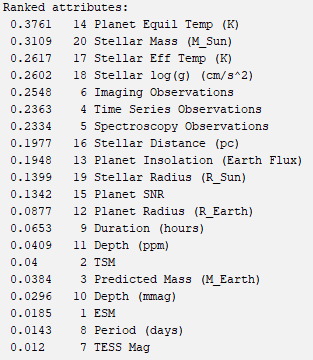

GainRatioAttributeEval

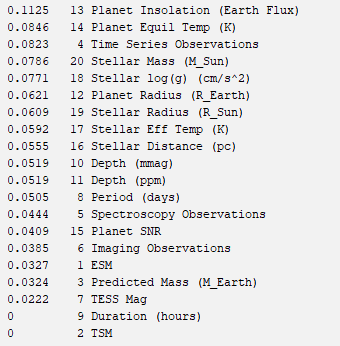

ReliefFAttributeEval

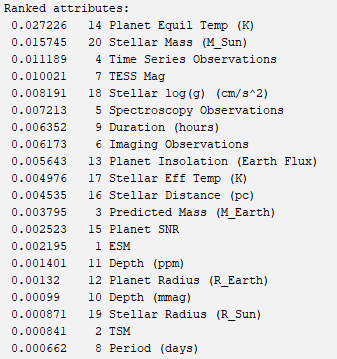

CfsSubsetEval with BestFirst Search Method

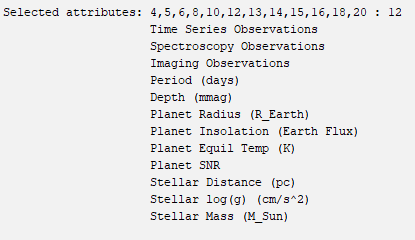

In [ ]:
correlation_attributes = """
Planet Equil Temp (K)
Stellar Mass (M_Sun)
Stellar Eff Temp (K)
Stellar log(g) (cm/s^2)
Imaging Observations
Time Series Observations
Spectroscopy Observations
Stellar Distance (pc)
Planet Insolation (Earth Flux)
Stellar Radius (R_Sun)
Planet SNR
Planet Radius (R_Earth)
Duration (hours)
Depth (ppm)
TSM
Predicted Mass (M_Earth)
Depth (mmag)
ESM
Period (days)
TESS Mag
"""

gain_ratio_attributes = """
Planet Insolation (Earth Flux)
Planet Equil Temp (K)
Time Series Observations
Stellar Mass (M_Sun)
Stellar log(g) (cm/s^2)
Planet Radius (R_Earth)
Stellar Eff Temp (K)
Stellar Distance (pc)
Depth (mmag)
Depth (ppm)
Period (days)
Spectroscopy Observations
"""

reliefF_attributes = """
Planet Equil Temp (K)
Stellar Mass (M_Sun)
Time Series Observations
TESS Mag
Stellar log(g) (cm/s^2)
Spectroscopy Observations
Duration (hours)
Imaging Observations
Planet Insolation (Earth Flux)
Stellar Eff Temp (K)
Stellar Distance (pc)
Predicted Mass (M_Earth)
"""

cfs_subset_attributes = """
Time Series Observations
Spectroscopy Observations
Imaging Observations
Period (days)
Depth (mmag)
Planet Radius (R_Earth)
Planet Insolation (Earth Flux)
Planet Equil Temp (K)
Planet SNR
Stellar Distance (pc)
Stellar log(g) (cm/s^2)
Stellar Mass (M_Sun)
"""

self_selected_attributes = """
Depth (ppm)
Planet Radius (R_Earth)
Planet Insolation (Earth Flux)
Planet Equil Temp (K)
Planet SNR
Stellar Eff Temp (K)
Stellar log(g) (cm/s^2)
Stellar Radius (R_Sun)
Stellar Mass (M_Sun)
Time Series Observations
Spectroscopy Observations
Imaging Observations
"""

In [ ]:
ATTRIBUTE_SELECTIONS = {
    "correlation": correlation_attributes,
    "gain_ratio": gain_ratio_attributes,
    "reliefF": reliefF_attributes,
    "cfs_subset": cfs_subset_attributes,
    "self_selected": self_selected_attributes,
}

MAX_ATTRIBUTES = 12

for name, attribute_set in ATTRIBUTE_SELECTIONS.items():
    attribute_set = attribute_set.strip().split("\n")[:MAX_ATTRIBUTES]
    attribute_set = [x.strip() for x in attribute_set]
    attribute_set.append("TFOPWG Disposition")
    print(f"{name}: {attribute_set}")

    # Save new train, test, validation sets using only the selected attributes
    all = df[attribute_set]
    train = X_train[attribute_set]
    test = X_test[attribute_set]
    val = X_val[attribute_set]

    all.to_csv(f"all-{name}.csv", index=False)
    train.to_csv(f"train-{name}.csv", index=False)
    test.to_csv(f"test-{name}.csv", index=False)
    val.to_csv(f"validation-{name}.csv", index=False)

correlation: ['Planet Equil Temp (K)', 'Stellar Mass (M_Sun)', 'Stellar Eff Temp (K)', 'Stellar log(g) (cm/s^2)', 'Imaging Observations', 'Time Series Observations', 'Spectroscopy Observations', 'Stellar Distance (pc)', 'Planet Insolation (Earth Flux)', 'Stellar Radius (R_Sun)', 'Planet SNR', 'Planet Radius (R_Earth)', 'TFOPWG Disposition']
gain_ratio: ['Planet Insolation (Earth Flux)', 'Planet Equil Temp (K)', 'Time Series Observations', 'Stellar Mass (M_Sun)', 'Stellar log(g) (cm/s^2)', 'Planet Radius (R_Earth)', 'Stellar Eff Temp (K)', 'Stellar Distance (pc)', 'Depth (mmag)', 'Depth (ppm)', 'Period (days)', 'Spectroscopy Observations', 'TFOPWG Disposition']
reliefF: ['Planet Equil Temp (K)', 'Stellar Mass (M_Sun)', 'Time Series Observations', 'TESS Mag', 'Stellar log(g) (cm/s^2)', 'Spectroscopy Observations', 'Duration (hours)', 'Imaging Observations', 'Planet Insolation (Earth Flux)', 'Stellar Eff Temp (K)', 'Stellar Distance (pc)', 'Predicted Mass (M_Earth)', 'TFOPWG Disposition']